In [31]:
import pandas as pd
import numpy as np

In [32]:
bd = pd.read_csv("bird_dino_data.csv")

In [33]:
#bd.head()

In [69]:
#Add "Whole Brain" column to bd
bd["Whole Brain"] = bd["Olfactory bulbs (cm3)"] + bd["Cerebrum (cm3)"] + bd["Optic Lobes (cm3)"] + bd["Cerebellum (cm3)"]

In [70]:
#bd.head()

In [71]:
#Whole brain to body ratio
body_r = bd["Whole Brain"] / bd["Body Mass (kg)"] / 1000
bd["Brain to Body Ratio"] = body_r

In [72]:
#bd.head()

In [73]:
#Cerebrum to whole brain ratio
cere_r = bd["Cerebrum (cm3)"] / bd["Whole Brain"]
bd["Cerebrum to Whole Brain Ratio"] = cere_r

In [74]:
bd.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain,Brain to Body Ratio,Cerebrum to Whole Brain Ratio
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.899,0.094950,0.805687
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,21.356,0.016949,0.787132
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,13.946,0.006397,0.794493
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.710,0.002840,0.577465
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.113,0.211300,0.743019


In [75]:
#Calculate average of each bird's and Dino's brains
B = bd.loc[bd["Bird vs Dino"] == "B"]
D = bd.loc[bd["Bird vs Dino"] == "D"]
B.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain,Brain to Body Ratio,Cerebrum to Whole Brain Ratio
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.899,0.094950,0.805687
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,21.356,0.016949,0.787132
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,13.946,0.006397,0.794493
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.113,0.211300,0.743019
7,8,B,0.90,0.234,5.95,0.99,0.96,0.55,8.134,0.009038,0.731497


In [76]:
D.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain,Brain to Body Ratio,Cerebrum to Whole Brain Ratio
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.710,0.002840,0.577465
5,6,D,85.96,0.569,9.52,3.60,5.16,3.78,18.849,0.000219,0.505067
6,7,D,0.50,0.077,0.60,0.36,0.24,0.17,1.277,0.002554,0.469851
9,10,D,12.61,0.028,3.71,1.31,1.60,2.17,6.648,0.000527,0.558063
14,15,D,49.30,1.080,14.81,4.75,3.16,2.35,23.800,0.000483,0.622269


In [77]:
#All these are in cm3

In [78]:
BBB = B["Brain to Body Ratio"].mean()

In [79]:
BCB = B["Cerebrum to Whole Brain Ratio"].mean()

In [80]:
DBB = D["Brain to Body Ratio"].mean()

In [81]:
DCB = D["Cerebrum to Whole Brain Ratio"].mean()

In [82]:
print(BBB, BCB, DBB, DCB)

0.045170238698633944 0.7094430277327214 0.0014002983908859297 0.5479339483969496


In [83]:
#Calculate ratios for your brain

In [84]:
#This function uses femur length in mm
#Output is in kg
def body_m(dtype, femur):
    if dtype == "ornithischian":
        return 10**(3.0587*np.log10(femur)-2.7042)/1000
    elif dtype == "sauropod":
        return 10**(2.3459*np.log10(femur)-0.2935)/1000
    elif dtype == "theropod":
        return 10**(3.1854*np.log10(femur)-3.184)/1000

In [85]:
XBM = body_m("theropod", 21)
XBM_g = XBM * 1000
XBM_g

10.660985224533874

In [111]:
olf = .3
brum = 2.1
opt = 1.5
bell = .6
vol = 2.2

whole = (olf+brum+opt+bell)
print(whole)

4.5


In [112]:
#Brain to body
XBB = whole / XBM_g
print(XBB)

0.42209982522480716


In [113]:
#Cerebrum to brain
XCB = brum / whole
print(XCB)

0.4666666666666667


In [114]:
#Compare your brain to averages

In [115]:
def compare(fl, bv, cw, bw):
    mass = body_m("theropod", fl) #body mass
    B2B = bw / mass * 1000 #brain to body
    C2B = cw / bw #cerebrum to brain
    
    BBB = B["Brain to Body Ratio"].mean()
    BCB = B["Cerebrum to Whole Brain Ratio"].mean()
    DBB = D["Brain to Body Ratio"].mean()
    DCB = D["Cerebrum to Whole Brain Ratio"].mean()

    if abs(B2B - BBB) < abs(B2B - DBB):
        B2B_ans = "Bird"
    elif abs(B2B - BBB) > abs(B2B - DBB):
        B2B_ans = "Dino"
        
    if abs(C2B - BCB) < abs(C2B - DCB):
        C2B_ans = "Bird"
    elif abs(C2B - BCB) > abs(C2B - DCB):
        C2B_ans ="Dino"
    return [B2B_ans, C2B_ans]

In [116]:
compare(2.1, 2.2, 2.1, 4.5)

['Bird', 'Dino']

In [117]:
if abs(XBB - BBB) < abs(XBB - DBB):
    print("Bird")
elif abs(XBB - BBB) > abs(XBB - DBB):
    print("Dino")

Bird


In [118]:
if abs(XCB - BCB) < abs(XCB - DCB):
    print("Bird")
elif abs(XCB - BCB) > abs(XCB - DCB):
    print("Dino")

Dino


 ## Graphing

In [119]:
import matplotlib.pyplot as plt

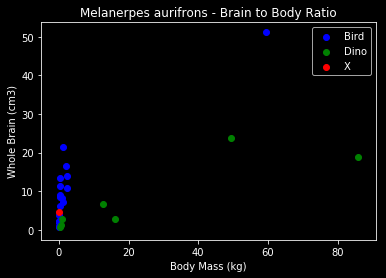

In [129]:
plt.style.use("dark_background")
plt.scatter(B["Body Mass (kg)"], B["Whole Brain"], color = "blue", label = "Bird")
plt.scatter(D["Body Mass (kg)"], D["Whole Brain"], color = "green", label = "Dino")
plt.scatter(XBM, whole, color = "red", label = "X")
plt.title("Melanerpes aurifrons - Brain to Body Ratio")
plt.xlabel("Body Mass (kg)")
plt.ylabel("Whole Brain (cm3)")
plt.legend()
plt.show()

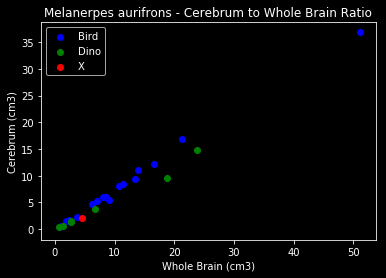

In [127]:
plt.style.use("dark_background")
plt.scatter(B["Whole Brain"], B["Cerebrum (cm3)"], color = "blue", label = "Bird")
plt.scatter(D["Whole Brain"], D["Cerebrum (cm3)"], color = "green", label = "Dino")
plt.scatter(whole, brum, color = "red", label = "X")
plt.title("Melanerpes aurifrons - Cerebrum to Whole Brain Ratio")
plt.xlabel("Whole Brain (cm3)")
plt.ylabel("Cerebrum (cm3)")
plt.legend()
plt.show()

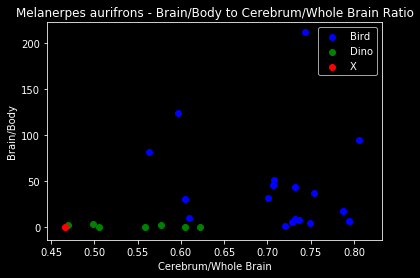

In [128]:
plt.style.use("dark_background")
plt.scatter(B["Cerebrum (cm3)"]/ B["Whole Brain"], B["Whole Brain"]/ B["Body Mass (kg)"], color = "blue", label = "Bird")
plt.scatter(D["Cerebrum (cm3)"]/ D["Whole Brain"], D["Whole Brain"]/ D["Body Mass (kg)"], color = "green", label = "Dino")
plt.scatter(XCB, XBB, color = "red", label = "X")
plt.title("Melanerpes aurifrons - Brain/Body to Cerebrum/Whole Brain Ratio")
plt.xlabel("Cerebrum/Whole Brain")
plt.ylabel("Brain/Body")
plt.legend()
plt.show()